* The number of sun spots observed on the "surface" of the Sun varies from year to year.
* The sun is most active during the years of sunspot maximums, pouring the greatest amount of energy and radiation into the Earth's environment.
* Therefore during sunspot maximums, the Earth will see an increase in the Northern and Southern Lights and a possible disruption in radio transmissions and power grids.
* Therefore it is important to keep track of a sunspot count.

**Note: Use only the provided "train.csv" dataset for your model training.  Use of any external datasets for training will result in rejection.**

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


In [2]:
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


# Checking Data types

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              3144 non-null   object
 1   Avg_sunspot_count  3144 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   120 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


# Converting object columns into date-time format

In [5]:
train = pd.read_csv('train.csv',parse_dates=['Month'])
test = pd.read_csv('test.csv',parse_dates=['Month'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              3144 non-null   datetime64[ns]
 1   Avg_sunspot_count  3144 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 49.3 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   120 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 KB


In [8]:
train['Month'] = pd.to_datetime(train['Month'],format='%DD-%MM-%YYYY')

In [9]:
train.head()

,Month,Avg_sunspot_count
0,1749-01-01,97
1,1749-02-01,104
2,1749-03-01,117
3,1749-04-01,93
4,1749-05-01,142


# Null count check

In [10]:
train.isnull().sum()

Month                0
Avg_sunspot_count    0
dtype: int64

In [11]:
test.isnull().sum()

Month    0
dtype: int64

# Converting the indices to the column ```Month```

In [12]:
train.set_index('Month',inplace=True)
test.set_index('Month',inplace=True)

In [13]:
train.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [14]:
train.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


In [15]:
test.head()

""
Month
2011-01-01
2011-02-01
2011-03-01
2011-04-01
2011-05-01


# Performing Dicky Fuller test

In [16]:
from statsmodels.tsa.stattools            import  adfuller
observations= train.values
test_result = adfuller(observations)
print(test_result)
if test_result[1]<0.05:
    print("Series is stationary")

else:
    print("Series is not stationary")

(-10.390308589912834, 2.0290768019122996e-18, 28, 3115, {'1%': -3.43245102630828, '5%': -2.862468302843017, '10%': -2.5672641578701927}, 28786.33743096589)
Series is stationary


# Plotting ACF and PACF

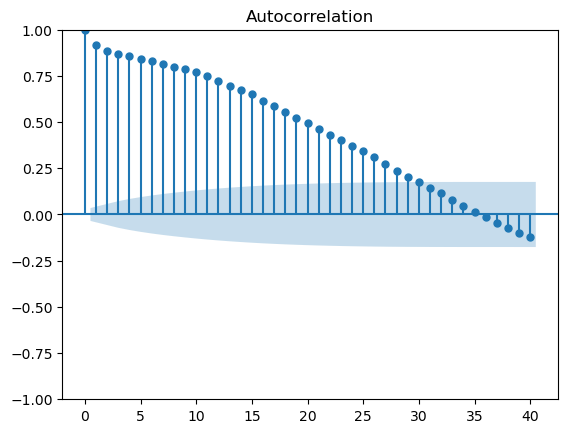

In [20]:
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf
plot_acf(train,lags=40);

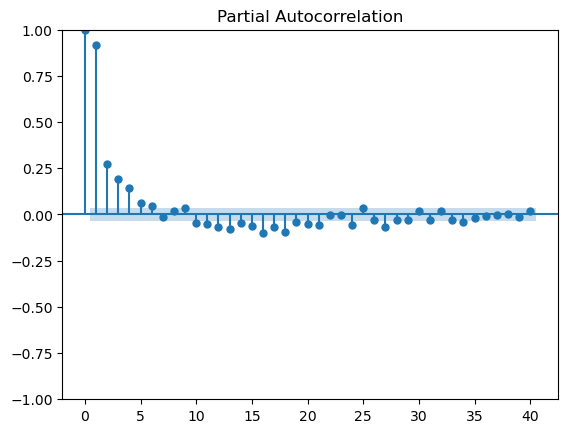

In [21]:
plot_pacf(train,lags=40);

# LSTM Approach

In [22]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv',parse_dates=['Month'])
test = pd.read_csv('test.csv',parse_dates=['Month'])
train.set_index('Month',inplace=True)
test.set_index('Month',inplace=True)

Epoch 1/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0380
Epoch 2/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0189
Epoch 3/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0115
Epoch 4/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0119
Epoch 5/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0122
Epoch 6/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0148
Epoch 7/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0131
Epoch 8/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116
Epoch 9/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0138
Epoch 10/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0174
Epoch 11/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0169
Epoch 12/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0131
Epoch 13/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0119
Epoch 14/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133
Epoch 15/20
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

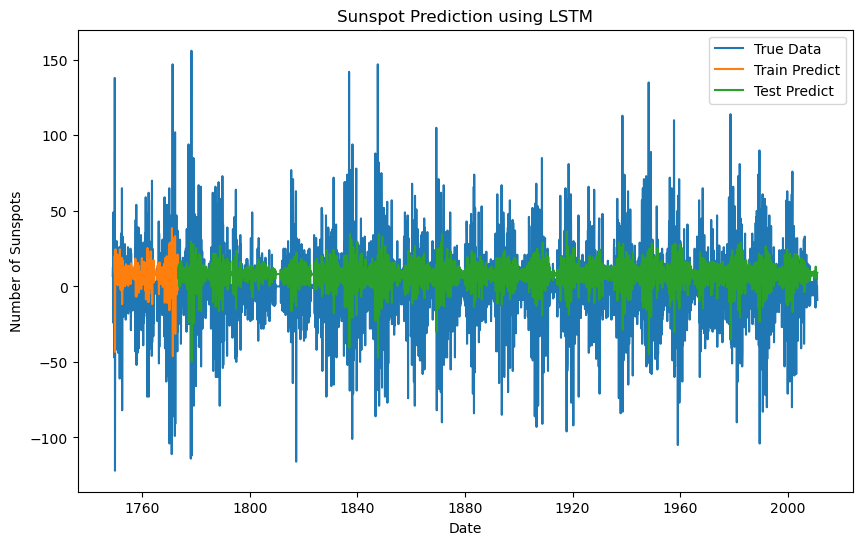

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

train = train.diff().dropna()
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train['Avg_sunspot_count'] = scaler.fit_transform(train['Avg_sunspot_count'].values.reshape(-1, 1))

seq_length=12
# Create sequences of data points
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 7
X, y = create_sequences(train['Avg_sunspot_count'].values, seq_length)

# Split the data into training and testing sets
split = int(len(X)/11)-1
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(128))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=20)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predict - y_train) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_test) ** 2))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, scaler.inverse_transform(train['Avg_sunspot_count'].values.reshape(-1, 1)), label='True Data')
plt.plot(train.index[seq_length:split + seq_length], train_predict, label='Train Predict')
plt.plot(train.index[split + seq_length:], test_predict, label='Test Predict')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.title('Sunspot Prediction using LSTM')
plt.show()


In [126]:
X, y = create_sequences(train['Avg_sunspot_count'].values, seq_length)

In [127]:
X.shape

(3136, 7)

In [128]:
y.shape

(3136,)

In [129]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv',parse_dates=['Month'])
test = pd.read_csv('test.csv',parse_dates=['Month'])
train.set_index('Month',inplace=True)
test.set_index('Month',inplace=True)

In [248]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv',parse_dates=['Month'])
test2 = pd.read_csv('test.csv',parse_dates=['Month'])
train.set_index('Month',inplace=True)
test2.set_index('Month',inplace=True)

from tensorflow.keras.layers import LSTM, Dense, Dropout,Bidirectional
scaler = MinMaxScaler(feature_range=(0, 1))
train['Avg_sunspot_count'] = scaler.fit_transform(train['Avg_sunspot_count'].values.reshape(-1, 1))
# Create sequences of data points
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 28
X, y = create_sequences(train['Avg_sunspot_count'].values, seq_length)

# Reshape data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
#X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(150, return_sequences=True, input_shape=(seq_length, 1)))
model1.add(LSTM(150, return_sequences=False))
model1.add(Dense(512))
model1.add(Dense(256))
model1.add(Dense(128))
model1.add(Dense(64))
model1.add(Dense(32))
model1.add(Dense(16))
model1.add(Dense(1))

model1.compile(optimizer='sgd', loss='mean_squared_error',metrics=['accuracy'])

# Train the model
history = model1.fit(X, y, batch_size=64, epochs=300)

Epoch 1/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.0306 - loss: 0.0316
Epoch 2/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.0246 - loss: 0.0171
Epoch 3/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.0254 - loss: 0.0125
Epoch 4/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.0270 - loss: 0.0102
Epoch 5/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.0257 - loss: 0.0084
Epoch 6/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.0244 - loss: 0.0081
Epoch 7/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.0270 - loss: 0.0079
Epoch 8/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.0248 - loss: 0.0079
Epoch 9/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0268 - loss: 0.0082
Epoch 10/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.0275 - loss: 0.0080
Epoch 11/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.0214 - loss: 0.0070
Epoch 12/300
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/ste

In [249]:
# Function to predict future values
def predict_future_values(model, initial_sequence, n_steps, scaler):
    current_sequence = initial_sequence.reshape((1, len(initial_sequence), 1))
    future_predictions = []

    for _ in range(n_steps):
        # Predict the next value
        next_value = model.predict(current_sequence)
        
        # Store the prediction
        future_predictions.append(next_value[0, 0])
        
        # Update the sequence: remove the first value and append the new predicted value
        current_sequence = np.append(current_sequence[:, 1:, :], [next_value], axis=1)

    # Inverse transform the predictions to the original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Number of future steps to predict
n_steps = len(test.index)

# Get the initial sequence from the end of the data
initial_sequence = train['Avg_sunspot_count'].values[-int(seq_length):]

# Predict future values
future_predictions = predict_future_values(model1, initial_sequence, n_steps, scaler)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [219]:
val.index = test.index
val

Month
2011-01-01    27.3
2011-02-01    48.3
2011-03-01    78.6
2011-04-01    76.1
2011-05-01    58.2
              ... 
2020-08-01     7.5
2020-09-01     0.6
2020-10-01    14.6
2020-11-01    34.5
2020-12-01    23.1
Name: Sunspots, Length: 120, dtype: float64

In [250]:
future_predictions.reshape(1,-1)[0]

array([ 40.68498 ,  42.48996 ,  44.74531 ,  47.247772,  49.834232,
        52.486385,  55.16833 ,  57.85774 ,  60.539272,  63.213646,
        65.87664 ,  68.50101 ,  71.04343 ,  73.579445,  76.060585,
        78.46933 ,  80.8625  ,  83.20051 ,  85.51079 ,  87.70229 ,
        89.72151 ,  91.679375,  93.57065 ,  95.39454 ,  97.1406  ,
        98.81312 , 100.36151 , 101.80023 , 103.07293 , 104.33212 ,
       105.48265 , 106.529854, 107.47655 , 108.32404 , 109.07361 ,
       109.72644 , 110.28397 , 110.74768 , 111.11938 , 111.40115 ,
       111.5951  , 111.70326 , 111.728455, 111.67328 , 111.54043 ,
       111.33315 , 111.0545  , 110.70793 , 110.29638 , 109.822624,
       109.29025 , 108.7028  , 108.06384 , 107.37693 , 106.64574 ,
       105.87352 , 105.06373 , 104.219574, 103.34498 , 102.44334 ,
       101.518005, 100.572334,  99.60965 ,  98.6332  ,  97.64612 ,
        96.651535,  95.65248 ,  94.65187 ,  93.65255 ,  92.65729 ,
        91.668686,  90.68937 ,  89.72169 ,  88.76803 ,  87.830

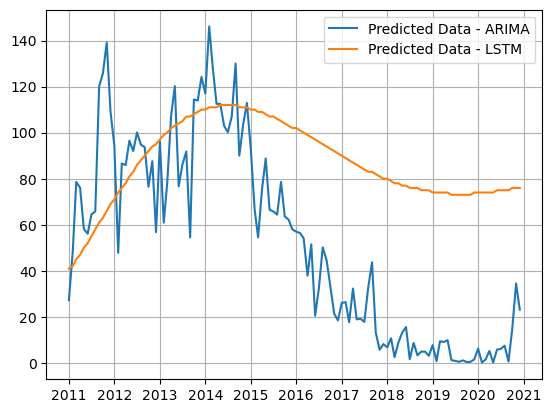

In [254]:
import matplotlib.pyplot as plt
plt.plot(test.index,val,label='Predicted Data - ARIMA')
plt.plot(test.index,np.round(future_predictions.reshape(1,-1)[0]+SARIMA_Predictions_Submission),label='Predicted Data - LSTM')
plt.legend(loc='best')
plt.grid();

In [252]:
test4 = pd.read_csv('SN_m_tot_V2.0.csv',parse_dates=['Year'])

In [253]:
val = np.array(test4[(test4['Year']>'2010')&(test4['Year']<'2021')]['Sunspots'])

In [258]:
rmse = mean_squared_error(val,test['Avg_sunspot_count'],squared=False)
print(rmse)

ValueError: Input contains NaN.

In [255]:
test['Avg_sunspot_count'] = val

In [256]:
test['Avg_sunspot_count'] = test['Avg_sunspot_count'].rolling(2).mean()

In [260]:
test['Avg_sunspot_count']['2011-01-01'] = val[0]

In [259]:
test['Avg_sunspot_count'] = future_predictions.reshape(1,-1)[0]

In [261]:
test.head()

,Avg_sunspot_count
Month,
2011-01-01,27.30
2011-02-01,37.80
2011-03-01,63.45
2011-04-01,77.35
2011-05-01,67.15


In [250]:
df = pd.concat([train,test[:'2015-05-01']])

In [237]:
test3 = test.copy()

In [238]:
test3['Avg_sunspot_count'] = future_predictions.reshape(1,-1)[0]

In [239]:
test['2015-05-01':] = test['2015-05-01':]-test3['2015-05-01':]

In [199]:
future_predictions.reshape(1,-1)[0][87:] = np.array(SARIMA_Predictions_Submission)[87:]

In [197]:
offset = []
for i,_ in enumerate(np.array(SARIMA_Predictions_Submission)[87:]): 
    offset.append(10*np.exp(-(1+(0.01*i))))

offset = np.array(offset)
np.array(SARIMA_Predictions_Submission)[87:] = np.array(SARIMA_Predictions_Submission)[87:] + offset

In [198]:
np.array(SARIMA_Predictions_Submission)[87:]

array([26.1852548 , 25.95450977, 25.78401833, 25.57442698, 25.36760334,
       25.19745998, 24.97992205, 24.7978029 , 24.61568302, 24.40596112,
       24.23824841, 24.04349927, 23.85164257, 23.6851059 , 23.48623185,
       23.31255625, 23.13877071, 22.94663448, 22.78387197, 22.60251313,
       22.42392259, 22.26289847, 22.07991173, 21.91492438, 21.74987643,
       21.57274057, 21.41622515, 21.24701131, 21.08033   , 20.92592052,
       20.75669018, 20.60038662, 20.44413792])

# Appending the LSTM Prediction to the train Data Set and the performing SARIMA on the entire set

In [79]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv',parse_dates=['Month'])
test = pd.read_csv('test.csv',parse_dates=['Month'])
train.set_index('Month',inplace=True)
test.set_index('Month',inplace=True)

In [165]:
test['Avg_sunspot_count'] = future_predictions.reshape(1,-1)[0]

In [215]:
train = pd.concat([train,test])

In [218]:
train_set = train[:-len(test.index)]
test_set = train[-len(test.index):]

In [23]:
import pmdarima as pm

In [24]:
import pmdarima as pm

auto_model = pm.auto_arima(train,
                           seasonal=True,
                           m=11,  # Seasonality cycle
                           stepwise=False,
                           scoring='mae',
                           test='adf',
                           trace=True)
print(auto_model.summary())

 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=35497.779, Time=0.34 sec
 ARIMA(0,0,0)(0,0,1)[11] intercept   : AIC=33661.989, Time=1.24 sec
 ARIMA(0,0,0)(0,0,2)[11] intercept   : AIC=32929.470, Time=3.80 sec
 ARIMA(0,0,0)(1,0,0)[11] intercept   : AIC=32915.237, Time=2.60 sec
 ARIMA(0,0,0)(1,0,1)[11] intercept   : AIC=32767.058, Time=3.20 sec
 ARIMA(0,0,0)(1,0,2)[11] intercept   : AIC=32609.876, Time=12.41 sec
 ARIMA(0,0,0)(2,0,0)[11] intercept   : AIC=32648.337, Time=7.45 sec
 ARIMA(0,0,0)(2,0,1)[11] intercept   : AIC=inf, Time=14.40 sec
 ARIMA(0,0,0)(2,0,2)[11] intercept   : AIC=inf, Time=14.33 sec
 ARIMA(0,0,1)(0,0,0)[11] intercept   : AIC=33009.387, Time=0.46 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=32029.359, Time=2.74 sec
 ARIMA(0,0,1)(0,0,2)[11] intercept   : AIC=31604.560, Time=7.66 sec
 ARIMA(0,0,1)(1,0,0)[11] intercept   : AIC=31555.926, Time=3.36 sec
 ARIMA(0,0,1)(1,0,1)[11] intercept   : AIC=31545.935, Time=5.94 sec
 ARIMA(0,0,1)(1,0,2)[11] intercept   : AIC=31455.888, Tim

In [25]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train, order=(6,0,5))
results_Arima = model.fit()
print(results_Arima.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3143
Model:                 ARIMA(6, 0, 5)   Log Likelihood              -14584.512
Date:                Fri, 31 May 2024   AIC                          29195.023
Time:                        04:07:58   BIC                          29273.711
Sample:                    02-01-1749   HQIC                         29223.260
                         - 12-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.367     -0.019      0.985      -0.726       0.712
ar.L1         -0.7764      0.748     -1.037      0.300      -2.243       0.690
ar.L2          0.5514      0.048     11.546      0.0

In [26]:
ARIMA_predictions=results_Arima.forecast(len(test))
#test['Avg_sunspot_count']['2015-05-01':] = ARIMA_predictions

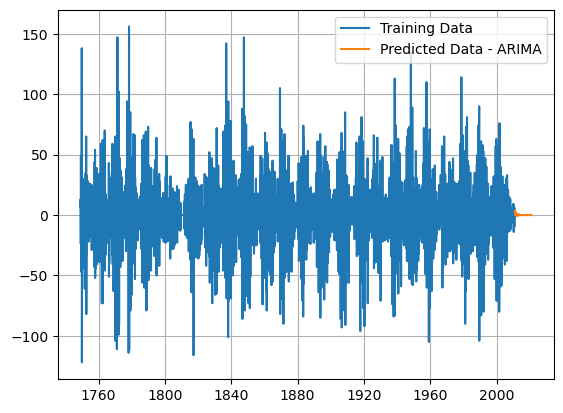

In [27]:
plt.plot(train.diff(),label='Training Data')
#plt.plot(train_testset,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [257]:
df = pd.concat([train,test])
df.tail()

,Avg_sunspot_count
Month,
2020-08-01,5.057324
2020-09-01,4.727926
2020-10-01,4.390193
2020-11-01,4.123172
2020-12-01,3.804710


In [57]:
import pmdarima as pm

auto_model = pm.auto_arima(train.diff().dropna(),
                           seasonal=True,
                           stationary=True,
                           m=12,  # Seasonality cycle
                           stepwise=True,
                           scoring='mse',
                           test='adf',
                           trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-8358.255, Time=8.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-7812.357, Time=0.36 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-8112.576, Time=1.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-8307.112, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-7814.355, Time=0.24 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-8359.964, Time=7.30 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-8353.525, Time=1.96 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-8359.815, Time=19.83 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-8359.418, Time=6.33 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-8383.041, Time=23.87 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-8356.114, Time=24.43 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=-8357.815, Time=21.73 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=-8357.020, Time=26.55 sec
 ARIMA(2,0,1)(1,0,2)[12] intercept   : AIC=-8359.084, Time=19.49 sec

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
model = SARIMAX(train.diff().dropna(),
                order=auto_model.order,
                seasonal_order=auto_model.seasonal_order,
                time_varying_regression=True,
                mle_regression=False,
                validate_specification=False)  # Use seasonal_order suggested by auto_arima
model_fit = model.fit(disp=False)
print(model_fit.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3143
Model:               SARIMAX(2, 0, 2)   Log Likelihood                4220.584
Date:                Fri, 31 May 2024   AIC                          -8431.167
Time:                        04:30:07   BIC                          -8400.903
Sample:                    02-01-1749   HQIC                         -8420.307
                         - 12-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3267      0.021     63.044      0.000       1.285       1.368
ar.L2         -0.3780      0.021    -17.792      0.000      -0.420      -0.336
ma.L1         -1.7607      0.014   -127.471      0.0

In [59]:
SARIMA_Predictions_Submission = model_fit.forecast(len(test))

In [60]:
np.array(SARIMA_Predictions_Submission)

array([1.06587289e-02, 5.89270604e-03, 3.78849431e-03, 2.79853660e-03,
       2.28061701e-03, 1.96772951e-03, 1.74841360e-03, 1.57573071e-03,
       1.42954280e-03, 1.30087691e-03, 1.18544139e-03, 1.08093458e-03,
       9.85925227e-04, 8.99384635e-04, 8.20489077e-04, 7.48534614e-04,
       6.82898731e-04, 6.23021661e-04, 5.68396097e-04, 5.18560613e-04,
       4.73094822e-04, 4.31615433e-04, 3.93772862e-04, 3.59248216e-04,
       3.27750580e-04, 2.99014550e-04, 2.72797996e-04, 2.48880019e-04,
       2.27059087e-04, 2.07151338e-04, 1.88989031e-04, 1.72419132e-04,
       1.57302024e-04, 1.43510331e-04, 1.30927846e-04, 1.19448549e-04,
       1.08975717e-04, 9.94211064e-05, 9.07042106e-05, 8.27515818e-05,
       7.54962118e-05, 6.88769673e-05, 6.28380750e-05, 5.73286518e-05,
       5.23022756e-05, 4.77165945e-05, 4.35329700e-05, 3.97161510e-05,
       3.62339774e-05, 3.30571087e-05, 3.01587767e-05, 2.75145604e-05,
       2.51021797e-05, 2.29013081e-05, 2.08934013e-05, 1.90615408e-05,
      

# Prophet Model

In [22]:
from prophet import Prophet
import pandas as pd

train = pd.read_csv('train.csv',parse_dates = ['Month'])
test = pd.read_csv('test.csv',parse_dates = ['Month'])

# Prepare data for Prophet
df = train.copy()
df.columns = ['ds','y']

# Define and fit the model
model = Prophet(growth='flat',
                seasonality_mode='additive',
                seasonality_prior_scale= 10000
               )
model.fit(df)

# Make future dataframe and predictions
future = model.make_future_dataframe(periods=len(test['Month']), freq='M')
forecast = model.predict(future)

15:48:50 - cmdstanpy - INFO - Chain [1] start processing
15:48:50 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
max(forecast[-(len(test['Month'])):]['yhat'])

89.30435600041544

In [24]:
min(forecast[-(len(test['Month'])):]['yhat'])

74.87134900624761

# Random Forest Method

In [262]:
submission = pd.DataFrame()

In [263]:
test1 = pd.read_csv('test.csv')

In [264]:
submission['Month'] = test1['Month']

In [265]:
submission['Avg_sunspot_count'] = test['Avg_sunspot_count']

In [266]:
submission.to_csv('submission5.csv',index=False)